# EXPLORATION DES DONNEES (EDA = Exploratory Data Analysis)

In [1]:
import matplotlib as mp
import plotly_express as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno 
import numpy as np
from datetime import datetime



# STEP 1: DATA SOURCING

In [2]:
df_house = pd.read_csv('kc_house_data.csv', encoding='latin')

# STEP 2: DATA CLEANING

## Dimension du jeu de données

In [3]:
#Nombres d'éléments et de colonnes
df_house.shape

(21613, 21)

# A quoi correspondent les features ? 

/home/nusbaumer/Documents/Projet final/Variables.png

## Nettoyer les titres des colonnes

In [4]:
df_house.columns = df_house.columns.str.strip().str.lower().str.replace(' ', '_')

## Valeurs manquantes

In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Il n'y a pas de valeurs manquantes

Vérification manuelle :

In [6]:
df_house['sqft_lot15'].isna().sum()

0

In [7]:
df_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Vérification en graphique : 

<AxesSubplot:>

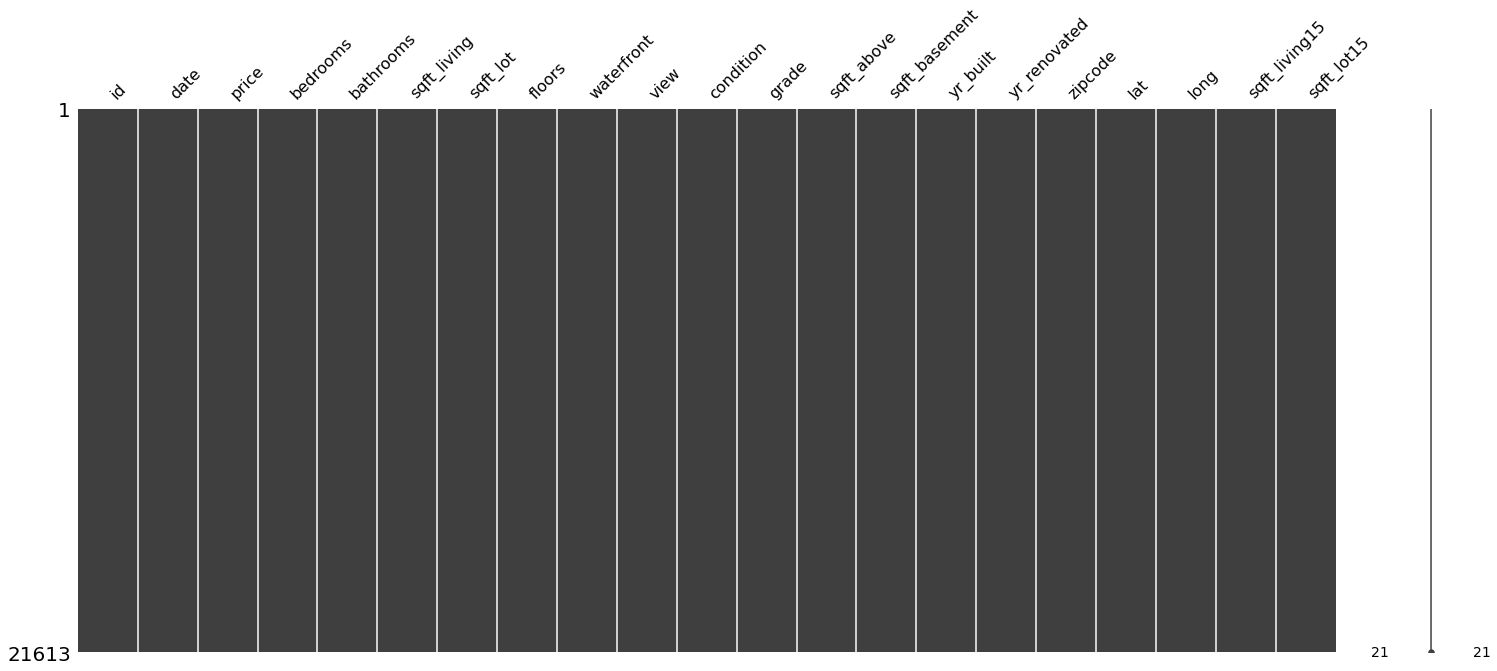

In [8]:
msno.matrix(df_house)

# Valeurs aberrantes ou atypiques (outliers / anomalies)

In [9]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Longitude négative, moyennes non-pertinentes (id, waterfront, view?, condition?,grade?, yr_renovated car 0 pris en compte pour les maisons non rénovées, zipcode)

# Valeurs dupliquées

In [10]:
df_house[df_house.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Vérification ciblée par colonne :

In [11]:
df_house[df_house.duplicated(subset=['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [12]:
df_house.loc[df_house['zipcode'].duplicated(keep=False),:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Aucune ligne dupliquée complètement mais certains id apparaissent sur deux lignes. Une maison peut être vendue deux fois ou plus mais les informations qui suivent ne sont pas identiques

# Harmoniser les valeurs

Convertir les dates

In [13]:
df_house['date']=pd.to_datetime(df_house.date)

Créer une colonne pour les les jours, les mois, les années

In [14]:
df_house['year']=df_house.date.dt.year

In [15]:
df_house['month']=df_house.date.dt.month

In [16]:
df_house['day']=df_house.date.dt.day

# Transformer zipcode en str puis appliquer OneHotEncoding

In [17]:
df_house['zipcode'] = df_house['zipcode'].astype('str')
df_house_zipcode=pd.get_dummies(df_house)
df_house_zipcode

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Distribution empirique

In [18]:
#Création tableau avec les modalités (ou catégories) et les effectifs (ou nombre d'occurences) du nombre de chambre par maison
effectifs = df_house['bedrooms'].value_counts()
modalites= effectifs.index
tab = pd.DataFrame(modalites, columns=['bedrooms'])
tab

,bedrooms
0,3
1,4
2,2
3,5
4,6
5,1
6,7
7,0
8,8
9,9


In [19]:
tab['effectifs'] = effectifs.values
tab

,bedrooms,effectifs
0,3,9824
1,4,6882
2,2,2760
3,5,1601
4,6,272
5,1,199
6,7,38
7,0,13
8,8,13
9,9,6


Il y a 9824 maisons du data set qui ont 3 chambres, ce qui en fait la modalité la plus fréquente. !! Il y a 13 maisons sans chambre (???) et 1 maison avec 33 chambres.

In [20]:
#Ajout de la colonne des fréquences (effectif / taille échantillon)
tab['f'] = tab['effectifs'] / len(df_house)
tab

,bedrooms,effectifs,f
0,3,9824,0.454541
1,4,6882,0.318419
2,2,2760,0.127701
3,5,1601,0.074076
4,6,272,0.012585
5,1,199,0.009207
6,7,38,0.001758
7,0,13,0.000601
8,8,13,0.000601
9,9,6,0.000278


In [21]:
#Calcul des fréquences cumulées (sommes cumulées des fréquences)
tab = tab.sort_values('bedrooms')
tab['F'] = tab['f'].cumsum()
tab

,bedrooms,effectifs,f,F
7,0,13,0.000601,0.000601
5,1,199,0.009207,0.009809
2,2,2760,0.127701,0.137510
0,3,9824,0.454541,0.592051
1,4,6882,0.318419,0.910471
3,5,1601,0.074076,0.984546
4,6,272,0.012585,0.997131
6,7,38,0.001758,0.998890
8,8,13,0.000601,0.999491
9,9,6,0.000278,0.999769


# Tendance centrale

Vérification de l'hypothèse précédente

In [41]:
df_house['bedrooms'].mode()

0    3
Name: bedrooms, dtype: int64

# Moyenne

In [42]:
df_house['bedrooms'].mean()

3.37084162309721

# Médiane

In [43]:
df_house['bedrooms'].median()

3.0

La tendance centrale, la moyenne et la médiane donnent le même résultat. Les maisons à 3 chambres sont les plus fréquentes du data set

# STEP 3 : UNIVARIATE ANALYSIS

# Calcul du pourcentage et  affichage camembert

Bathrooms

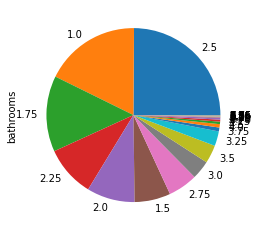

In [22]:
df_house.bathrooms.value_counts(normalize=True).plot.pie()
plt.show()

Waterfront

In [23]:
df_house.waterfront.value_counts(normalize=True)

0    0.992458
1    0.007542
Name: waterfront, dtype: float64

99% des maisons  du data set ne sont pas au bord de l'eau. On peut en déduire que la corrélation avec le prix n'est pas significative. Vérification:

# Corrélation variables au prix

In [24]:
df_house.drop('price', axis=1).corrwith(df_house['price']).sort_values(ascending=False)

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
id              -0.016762
dtype: float64

Autre affichage:

In [25]:
df_house[df_house.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


En effet, la vaiable waterfront a une corrélation au prix inférieur au taux significatif (0.3)

# Analyse statistique

In [26]:
df_house.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

La moyenne des sdb du data set sont de 2 par maison

# STEP 4 : BIVARIATE ANALYSIS

# > Numeric-Numeric Analysis

# Scatter plot

Tracer le nuage de points des zipcodes et prix dans le data set

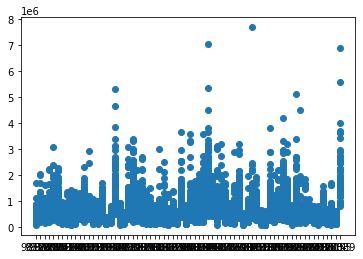

In [27]:
plt.scatter(df_house.zipcode, df_house.price)
plt.show()

Tracer le nuage de points des sqft_living et prix dans le data set

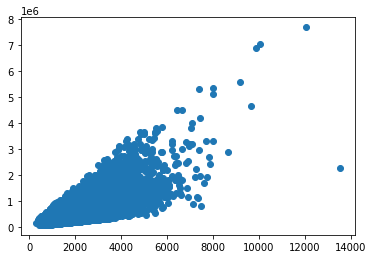

In [28]:
plt.scatter(df_house.sqft_living, df_house.price)
plt.show()

# Pair plot

Let’s plot Pair Plots for the three columns we used in plotting Scatter plots (with Seaborn)

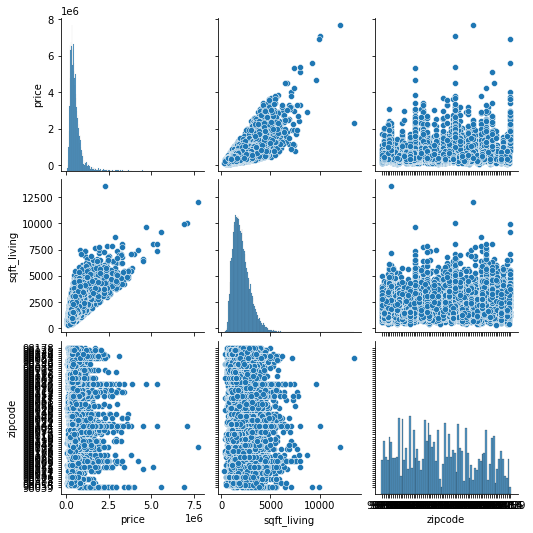

In [29]:
sns.pairplot(data= df_house, vars=['price','sqft_living','zipcode'])
plt.show()

# Correlation Matrix

Utilisé pour comparer 3 variables numériques dans un seul graph

In [30]:
#Création d'une matrix de corrélation avec price, zipcode, sqft_living comme lignes et colonnes
df_house[['price', 'zipcode', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


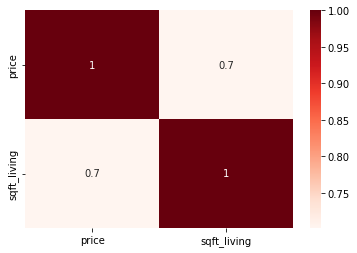

In [31]:
#Création heatmap
sns.heatmap(df_house[['price', 'zipcode', 'sqft_living']].corr(), annot=True, cmap= 'Reds')
plt.show()

# Corrélation des zipcodes en fontion du prix

In [32]:
corr=df_house_zipcode[df_house_zipcode.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame().head(95)

In [33]:
np.abs(corr['price']).sort_values(ascending=False).head(30)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
zipcode_98004    0.271131
waterfront       0.266369
floors           0.256794
zipcode_98039    0.212558
zipcode_98040    0.204873
zipcode_98112    0.169842
zipcode_98006    0.133695
yr_renovated     0.126434
zipcode_98023    0.106093
zipcode_98033    0.102556
zipcode_98042    0.100370
zipcode_98001    0.092179
zipcode_98168    0.091665
zipcode_98105    0.090974
sqft_lot         0.089661
zipcode_98075    0.088676
zipcode_98199    0.083659
sqft_lot15       0.082447
zipcode_98002    0.080300
zipcode_98038    0.079044
Name: price, dtype: float64

# > Numeric-Categorical Analysis

# Mean

In [34]:
#Conversion année en str > categorical
df_house['year'] = df_house['year'].astype('str')

#Grouper par année de vente pour trouver la MOYENNE des prix en fonction des années
df_house.groupby('year')['price'].mean()

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

Il y a une faible différence entre les deux années de vente, pour lesquelles le prix moyen de vente est plus élevé en 2015 qu'en 2014. Statistiquement significatif?

# Median

In [35]:
#Grouper par année de vente pour trouver la MEDIANE des prix en fonction des années
df_house.groupby('year')['price'].median()

year
2014    450000.0
2015    450500.0
Name: price, dtype: float64

Tant pour la moyenne que pour la médiane, les prix de vente ne semble pas être influencés de façon importante par l'année de vente. Regardons leur comportement avec une box plot pour vérifier cette hypothèse.

# Box plot

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


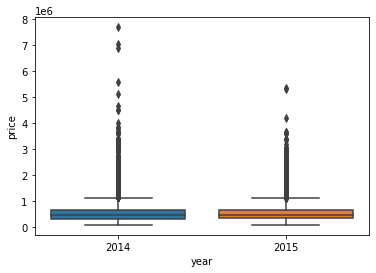

In [36]:
sns.boxplot(df_house.year, df_house.price)
plt.show()

Interprétation? 

# > Categorical - Categorical Analysis

In [37]:
#Créer un year_rate avec des données numériques où l'année "2014"=1, "2015"=0
df_house['year_rate'] = np.where(df_house.year=='2014',1,0)
df_house.year_rate.value_counts()

1    14633
0     6980
Name: year_rate, dtype: int64

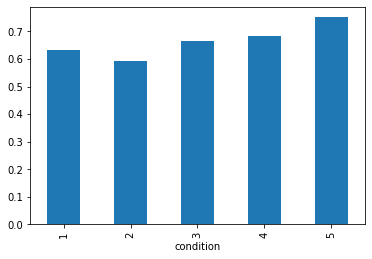

In [38]:
#Créer un bar graph de la condition des maisons avec la moyenne des year_rate
df_house.groupby('condition')['year_rate'].mean().plot.bar()
plt.show()

Il y a plus d'achat de maisons en très bonne condition (axis1, 5) en 2014 (axis0, 1) dans le data set.

# > Multivariate Analysis

In [39]:
#Création pivot table avec les colonnes condition
result=pd.pivot_table(data=df_house, index='year', columns='condition', values='price')
result

condition,1,2,3,4,5
year,,,,,
2014,277944.736842,311687.647059,539900.640987,520966.653935,611183.778560
2015,432000.000000,350017.842857,546243.233091,521702.456208,616147.283688


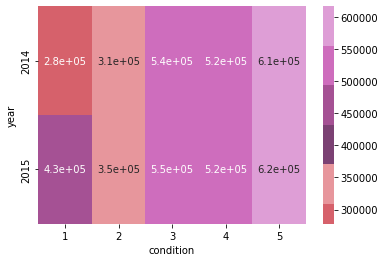

In [40]:
#Création d'une heatmap des prix vs condition vs year
sns.heatmap(result, annot=True, cmap='tab20b', center=0.117)
plt.show()

A partir de la heatmap, on peut déduire que les maisons avec la moins bonne condition sont achetées à un prix plus bas en 2014 qu'en 2015

# Mesures de dispersion

In [45]:
#Calcul de la variance empirique corrigée
df_house['price'].var(ddof=0)

134776142225.57248

In [54]:
#Calcul de l'écart type empirique
df_house['price'].std()

367127.1964826997

In [51]:
#Calcul du coefficient de variation
df_house['price'].std%df_house['price'].mean()

TypeError: unsupported operand type(s) for %: 'method' and 'float'

# Boîte à moustache des prix

Pour la distribution empirique

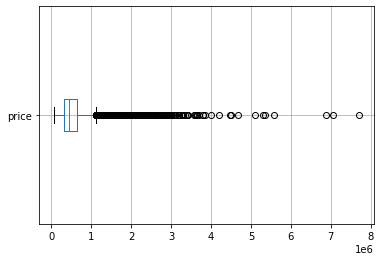

In [52]:
df_house.boxplot(column='price', vert=False)
plt.show()

# Quelles valeurs prennent chaque feature?

# Quelles seront les features utiles pour mon modèle ? 